<a href="https://colab.research.google.com/github/seon0415/BPA-/blob/main/%EB%B0%95%EC%84%9C%EC%97%B029_0319_%ED%95%84%EC%88%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 타이타닉 데이터를 가지고 IQR 값을 계산해 주시고, 제거 전과 후에 대한 통계치를 비교 분석해 주세요.
- IQR을 사용하려면 수치형데이터

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

df=pd.read_csv('titanic (1).csv')
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## **결측치 확인**

In [ ]:
df.isna().sum()

<Axes: ylabel='fare'>

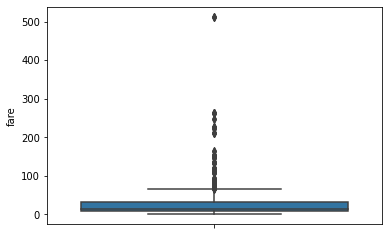

In [ ]:
sns.boxplot(data=df,y='fare')

## **이상치 확인**

In [ ]:
#1사분위수
p25= df['fare'].quantile(0.25)

#3사분위수
p75= df['fare'].quantile(0.75)

#1사분위수와 3사분위수 사이의 거리
iqr= p75 - p25

print("p25=",p25, ", p75=", p75, ", iqr=", iqr, ", 최솟값=", min(df['fare']), ", 최댓값=", max(df['fare']), ", 평균=", df['fare'].mean())

p25= 7.9104 , p75= 31.0 , iqr= 23.0896 , 최솟값= 0.0 , 최댓값= 512.3292 , 평균= 32.204207968574636


In [ ]:
#아래하한선
p25 - 1.5*iqr    

-29.937499999999996

In [ ]:
#위상한선: 
p75 + 1.5*iqr

71.3625

In [ ]:
df[df['fare']>71.3625]['fare'].count()

94

In [ ]:
np.where(df['fare']>71.3625)
#이거 왜이러지

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
889    False
890    False
Name: fare, Length: 714, dtype: bool

## **이상치 제거**

In [ ]:
df1=df.copy()

In [ ]:
#'요금' 결측치로 성정
df['fare']=np.where(df['fare']>71.3625, np.nan, df['fare'])
df.isna().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare           102
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#'요금' 결측치 설정전 평균
df1['fare'].mean()

32.204207968574636

In [ ]:
#'요금' 결측치 제거후 평균
df.dropna()
df['fare'].mean()

18.73771051964512

In [ ]:
df['fare']

<Axes: ylabel='fare'>

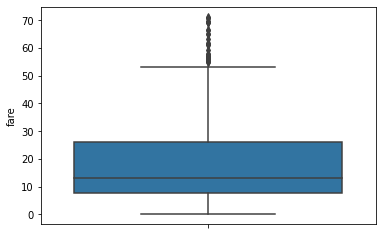

In [ ]:
sns.boxplot(data=df['fare'],y='fare')